Sales Analysis

In [1]:
import pandas as pd
import os

Merging 12 months of data of sales into a single csv file

In [2]:
df = pd.read_csv("/Users/abhishekshah/Desktop/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("/Users/abhishekshah/Desktop/Sales_Data")]

all_months_data =pd.DataFrame()

for file in files:
    df = pd.read_csv("/Users/abhishekshah/Desktop/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv",index=False)

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Clean up the data
Drop row of NaN

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Find "OR" and delete it

In [5]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]


Augment Data with Additional column
##2 Add Month column

In [6]:
all_data['month']=all_data['Order Date'].str[0:2]
all_data['month']=all_data['month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


Add a Sales column

## convert columns to correct type

In [7]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data['Quantity Ordered']) # Make int
all_data["Price Each"] = pd.to_numeric(all_data['Price Each']) # make float

In [8]:
all_data["sales"]=all_data["Quantity Ordered"]* all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


Q1: What was the best month for sales? How much was earned that month?

In [9]:
results = all_data.groupby("month").sum()
results

,Quantity Ordered,Price Each,sales
month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


Add a City column

In [10]:
#Let's use the .apply()
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City']= all_data['Purchase Address'].apply(lambda x : get_city(x) + " ( "+ get_state(x)+ ")")

all_data.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City ( NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City ( NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City ( NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco ( CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta ( GA)
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City ( NY)
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035",12,11.95,Portland ( OR)
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas ( TX)
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas ( TX)
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001",12,11.96,Dallas ( TX)


Text(0.5, 0, 'Month number')

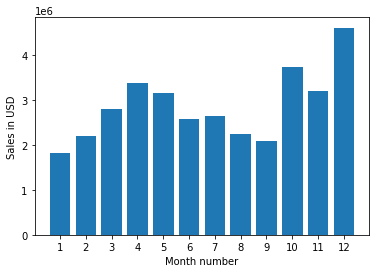

In [11]:
import matplotlib.pyplot as plt
months = range(1,13)

plt.bar(months, results['sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')


In [12]:
# What US city had the highest number of sales

In [13]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,month,sales
City,,,,
Atlanta ( GA),16602,2779908.20,104794,2795498.58
Austin ( TX),11153,1809873.61,69829,1819581.75
Boston ( MA),22528,3637409.77,141112,3661642.01
Dallas ( TX),16730,2752627.82,104620,2767975.40
Los Angeles ( CA),33289,5421435.23,208325,5452570.80
New York City ( NY),27932,4635370.83,175741,4664317.43
Portland ( ME),2750,447189.25,17144,449758.27
Portland ( OR),11303,1860558.22,70621,1870732.34
San Francisco ( CA),50239,8211461.74,315520,8262203.91


Text(0.5, 0, 'Sales by Cities')

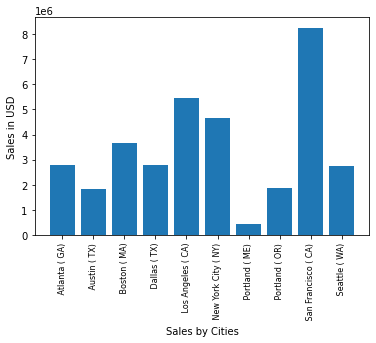

In [14]:
import matplotlib.pyplot as plt
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['sales'])
plt.xticks(cities, rotation = 'vertical',size = 8)
plt.ylabel('Sales in USD')
plt.xlabel('Sales by Cities')

## What time should we display advertisement to maximize the likelyhood of customer's buying product?

In [15]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City ( NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City ( NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City ( NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco ( CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta ( GA),12,38


<AxesSubplot:xlabel='Hour'>

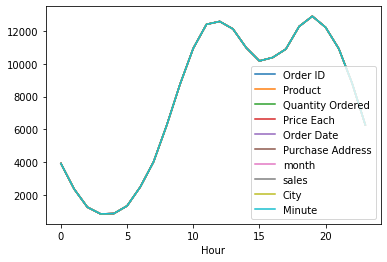

In [16]:
all_data.groupby(['Hour']).count().plot()


# What product are sold together best?

In [17]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(20)

/var/folders/r5/3bmqd5d91l7d11d1x39m82v00000gn/T/ipykernel_39005/1215602495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
80,295737,"iPhone,Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor,Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones,Wired Headphones"
129,295783,"Vareebadd Phone,USB-C Charging Cable"
133,295786,"USB-C Charging Cable,Apple Airpods Headphones"


In [18]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


What product sold the most and why it sold the most?

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City ( NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City ( NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City ( NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco ( CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta ( GA),12,38


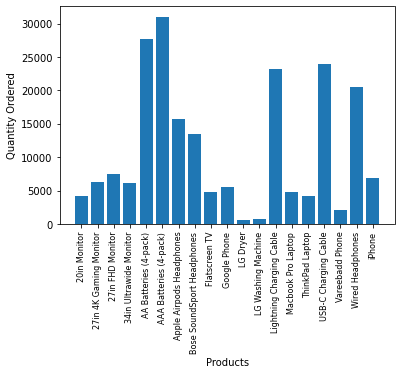

In [20]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
plt.bar(products,quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(products, rotation = 'vertical',size = 8)
plt.rcParams["figure.figsize"] = (15, 10)
plt.show()



/var/folders/r5/3bmqd5d91l7d11d1x39m82v00000gn/T/ipykernel_39005/2398919644.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size = 8)


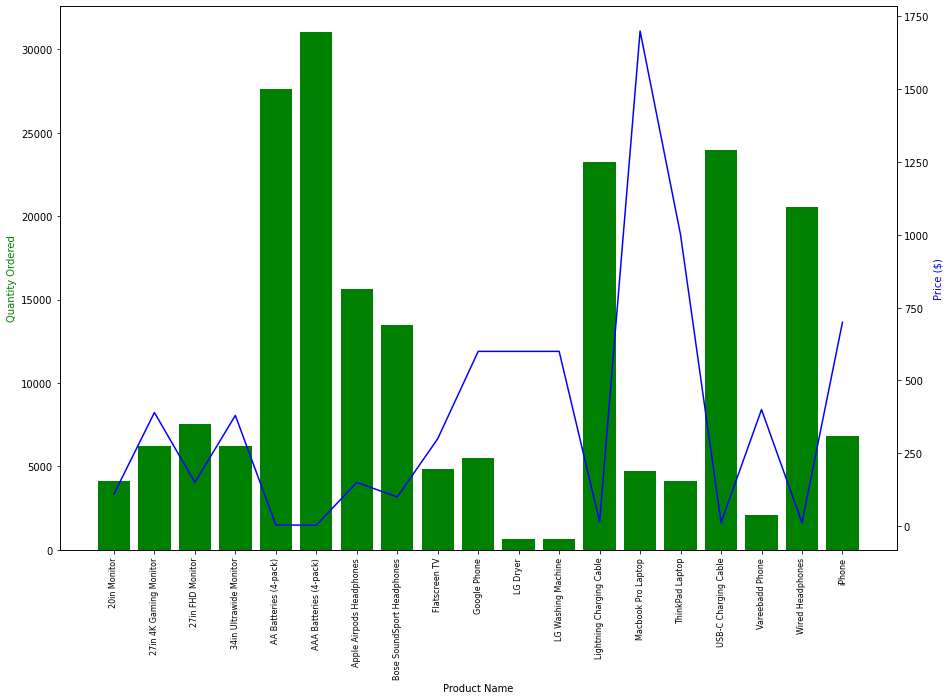

In [21]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products,rotation='vertical',size = 8)

plt.show()